# # Review: Week 1, 2 and mid week 3

## ## Week 1

## I) Edge detection

In [582]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [583]:
dt = datasets.load_digits()

In [584]:
# print(dt.DESCR)

In [585]:
len(dt.data), len(dt.target), len(dt.target_names), len(dt.images)

(1797, 1797, 10, 1797)

In [586]:
dt.data.shape

(1797, 64)

In [587]:
dt.target.shape

(1797,)

In [588]:
dt.images.shape

(1797, 8, 8)

In [589]:
no1 = dt.images[1]
no1_target = dt.target[1]

print('vector:\n{}\nlabel:{}'.format(no1, no1_target))

vector:
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
label:1


The above array would look like something like this:

![](media/1.png)

*(Check below to see that I got that right lol)*

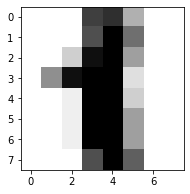

In [590]:
plt.figure(1, figsize=(3, 3))
plt.imshow(no1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

**Example: Vertical edge detection**

Define the edge detector:

In [591]:
v_edge_detector = np.array([
                        [1, 0, -1],
                        [1, 0, -1],
                        [1, 0, -1]
])

Let's define helper functions:

In [592]:
# Walk over the picture

def stride(_image, _filter, add_stride=0):
    coords = []
    h = _image.shape[0]
    w = _image.shape[1]
    f_h = _filter.shape[0]
    f_w = _filter.shape[1]
    # Note that we don't need to set default stride value
    # of 1 because we are already iterating over the
    # lines and columns
    for line in range(h):
        for col in range(w):
            start = line, col
            end = line + f_h + add_stride, col + f_w + add_stride
            if end[0] <= h:
                if end[1] <=  w:
                    coords.append([start, end])
    return coords

Input dimension:

$n_{height}^{[l-1]}$ x $n_{width}^{[l-1]}$ x $n_{channels}^{[l-1]}$

Output dimension:

$n_{height}^{[l]}$ x $n_{width}^{[l]}$ x $n_{channels}^{[l]}$

**where**,

$n^{[l]} = floor([\frac{n^{[l]}+2*p^{[l]}-f}{s^{[l]}} +1]$)

**if** $height \neq width$, **then**

$n_{height}^{[l]} = floor([\frac{n_{height}^{[l]}+2*p^{[l]}-f}{s^{[l]}} +1]$)

**and**,

$n_{width}^{[l]} = floor([\frac{n_{width}^{[l]}+2*p^{[l]}-f}{s^{[l]}}+1]$)

In [593]:
# Perform the convolution
    
def conv2d(_image, _filter, add_stride=0, verbose=True):
    convs = []
    coords = stride(_image, _filter, add_stride)
    f_x = _filter.shape[0]
    f_y = _filter.shape[1]
    for c in coords:
        # start
        s_x = c[0][0]
        s_y = c[0][1]
        # end
        e_x = c[1][0]
        e_y = c[1][1]
        window = _image[s_x:e_x, s_y:e_y]
        conv = window * _filter
        det = np.sum(conv)
        convs.append(det)
        if verbose == True:
            print('Coords: {}'.format(c))
            print('Slice:\n{}'.format(window))
            print('Conv:\n{}'.format(conv))
            print('Sum: {}'.format(det) + '\n')
    # We need to save the results from each convolution
    # in our new convolution result matrix
    # The result matrix shall have height and width:
    # (h_prev - filter_h) + 1
    r_h = _image.shape[0] - f_x + 1
    r_w = _image.shape[1] - f_y + 1
    # Now, fill in the values from the convolution
    # into the result matrix
    r = np.array(convs).reshape(r_h, r_w)
    return r

**Case I**:

In [594]:
vertical_array = np.array([
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0]
    ])

vertical_array, vertical_array.shape

(array([[10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0]]), (6, 6))

In [595]:
vertical_conv = conv2d(vertical_array, v_edge_detector, verbose=False)
vertical_conv

array([[ 0, 30, 30,  0],
       [ 0, 30, 30,  0],
       [ 0, 30, 30,  0],
       [ 0, 30, 30,  0]])

In [596]:
vertical_conv > 0

array([[False,  True,  True, False],
       [False,  True,  True, False],
       [False,  True,  True, False],
       [False,  True,  True, False]])

**Case II**:

In [597]:
no1

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

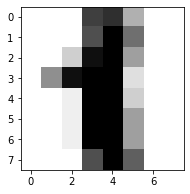

In [598]:
plt.figure(1, figsize=(3, 3))
plt.imshow(no1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [599]:
no1_conv_v = conv2d(no1, v_edge_detector, verbose=False)
no1_conv_v

array([[ -3., -38., -42.,  18.,  45.,  20.],
       [-18., -35., -30.,  25.,  48.,  17.],
       [-19., -40., -29.,  36.,  48.,  11.],
       [-17., -41., -31.,  37.,  48.,  11.],
       [ -3., -48., -45.,  33.,  48.,  15.],
       [ -2., -43., -46.,  21.,  48.,  22.]])

Let's see it another way:

In [600]:
no1_conv_v > 0

array([[False, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True]])

See how it captures the vertical edge?

Let's try it again applying a horizontal edge detector:

In [601]:
h_edge_detector = v_edge_detector.T
h_edge_detector

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [602]:
no1

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

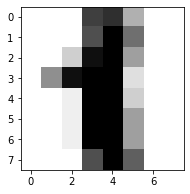

In [603]:
plt.figure(1, figsize=(3, 3))
plt.imshow(no1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [604]:
no1_conv_h = conv2d(no1, h_edge_detector, verbose=False)

In [605]:
no1_conv_h > 0

array([[False, False, False, False, False, False],
       [False, False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True, False, False, False],
       [False, False, False, False, False, False],
       [ True,  True,  True,  True, False, False]])

___
We may also use the filter matrix values as parameters to be learned by backprop:

![](media/pback.png)

Just remember that the *Loss* will point out how fare we are from the actual target, and the learning rate together with the partial derivatives will update the weights, leading them to our goal of feature detection.

## II) Convolutions over volume

We will apply convolution in the following form:

$Image_{8x8x3} * Filter_{3x3x3} = Conv_{6x6}$

Note that since the image has 3 channels, the filter also have to, so it handles the image well.

**Example:**

In [625]:
from PIL import Image

In [626]:
image = Image.open('media/sunflower.jpeg')

Behold my mighty sunflower and its pixels:

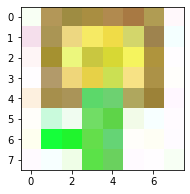

In [641]:
plt.figure(1, figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Notice it's three (RGB) channels

In [642]:
sunf = np.asarray(image)
sunf.shape

(8, 8, 3)

Let's try again with the $vertical$ $edge$ $detection$.

<div class="alert alert-warning">
Note that we will apply the <b>same filter</b> for all the channels.

This doesn't need to happen like this.

Usually, each filter channel will be aimed at something different.

Remember that there's the possibility for the values of the filter to become parameters updated using gradient descent! So they'll probably be distinct all over.

</div>

In [643]:
vert_detect_3d = np.array([
                            [
                                [1, 0, -1],
                                [1, 0, -1],
                                [1, 0, -1]
                            ],
                            [
                                [1, 0, -1],
                                [1, 0, -1],
                                [1, 0, -1]
                            ],
                            [
                                [1, 0, -1],
                                [1, 0, -1],
                                [1, 0, -1]
                            ]
                        ])

vert_detect_3d.shape

(3, 3, 3)

In [644]:
# For pixel values, typically 0 is taken to be black, and 255 is taken to be white.
# Let's divide all pixels by 255 to keep it simple.

# sunf = sunf/255.0

We need to apply it to EACH channel.

Helper functions time:

In [645]:
def stride3d(_image, _filter, add_stride=0):
    coords = []
    h = _image.shape[0]
    w = _image.shape[1]
    c = _image.shape[2]
    f_h = _filter.shape[0]
    f_w = _filter.shape[1]
    f_c = _filter.shape[2]
    # Note that we don't need to set default stride value
    # of 1 because we are already iterating over the
    # lines and columns
    for channel in range(c):
        for line in range(h):
            for col in range(w):
                start = line, col
                end = line + f_h + add_stride, col + f_w + add_stride
                if end[0] <= h:
                    if end[1] <= w:
                        coords.append([start, end, channel])
    return coords   

In [646]:
def conv3d(_image, _filter, add_stride=0, verbose=False):
    convs = []
    coords = stride3d(_image, _filter)
    f_x = _filter.shape[0]
    f_y = _filter.shape[1]
    f_z = _filter.shape[2]
    for xyc in coords:
        #channel
        s_c = xyc[2]
        # start
        s_x = xyc[0][0]
        s_y = xyc[0][1]
        # end
        e_x = xyc[1][0]
        e_y = xyc[1][1]
        window = _image[s_x:e_x, s_y:e_y, s_c]
        conv = window * _filter
        det = np.sum(conv)
        convs.append(det)
        if verbose == True:
            print('Coords: {}'.format(xyc))
            print('Slice:\n{}'.format(window))
            print('Conv:\n{}'.format(conv))
            print('Sum: {}'.format(det) + '\n')
    # We need to save the results from each convolution
    # in our new convolution result matrix
    # The result matrix shall have height and width:
    # (h_prev - filter_h) + 1
    # and the same number of channels of both image and filter
    r_h = _image.shape[0] - f_x + 1
    r_w = _image.shape[1] - f_y + 1
    r_c = _image.shape[2]
    # Now, fill in the values from the convolution
    # into the result matrix
    r = np.array(convs).reshape(r_h, r_w, r_c)
    return r    

In [647]:
sunf_conv = conv3d(_image=sunf, _filter=vert_detect_3d, verbose=False)

In [648]:
sunf_conv.shape

(6, 6, 3)

Remember the image:

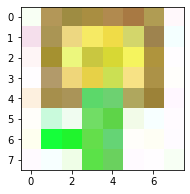

In [649]:
plt.figure(1, figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [869]:
rgb = ['R', 'G', 'B']
for channel in range(sunf_conv.shape[2]):
    print('Channel: {}\nConv\n{}\n'.format(rgb[channel],
                                           sunf_conv[:, :, channel]))

Channel: R
Conv
[[  348   -24   126   -75   351  -429]
 [  342  -684   960 -1101   759 -1344]
 [  363   -12   135  -126   387   -39]
 [  399     6   315   -39    27  -258]
 [ 1218  -117  1083  -297  1167  -240]
 [  834  -543  1017  -882   684 -1467]]

Channel: G
Conv
[[ -306   369  -495   459   -45    72]
 [  327  -507   249 -1059   495 -1365]
 [ -390   417  -582   705  -546   675]
 [ -297   342   -33   -18   273  -387]
 [  -27   -60     9   -12   -33   180]
 [  372  -342   216  -759   855 -1413]]

Channel: B
Conv
[[   -3  -390   162  -153   354  -294]
 [  729  -303   414  -276   630   -12]
 [   84  -531    48  -234  -120  -351]
 [  -93  -324    33  -231   351    -6]
 [  354 -1479   510 -1281   261 -1320]
 [  546  -906   213  -567   699   -51]]



There you go!

## III) Pooling

We just conv'd the sunflower,

In [740]:
sunf_conv.shape

(6, 6, 3)

Helper functions:

In [1040]:
def poolWindow(_in, _w_size, pretty=False):
    i_x = _in.shape[0]
    i_y = _in.shape[1]
    i_z = _in.shape[2]
    coords = []
    for z in range(i_z):
        for x in range(i_x):
            for y in range(i_y):
                start = x, y
                end = x + _w_size, y + _w_size
                if end[0] < i_x + 1:
                    if end[1] < i_y + 1:
                        coords.append([start, end, z])
    return coords

In [1043]:
from math import floor

In [1058]:
def maxPool(_in, _w_size, pretty=False):
    print('input shape = {}'.format(_in.shape))
    coords = poolWindow(_in, _w_size)
    pools = []
    output = ''
    for c in coords:
        x_start = c[0][0]
        x_end = c[1][0]
        y_start = c[0][1]
        y_end = c[1][1]
        z = c[2]
        window = _in[x_start:x_end, y_start:y_end, z]
        maxpool = np.max(window)
        pools.append(maxpool)
        if pretty == True:
            print('x: {} -> {}, y: {} -> {}, z: {}'.format(x_start,
                                                            x_end,
                                                            y_start,
                                                            y_end,
                                                            z))
            print('window:\n{}'.format(window))
            print('max pool = {}\n'.format(maxpool))
    out_shape_x = floor((_in.shape[0] - _w_size) + 1)
    out_shape_y = floor((_in.shape[1] - _w_size) + 1)
    out_shape_z = _in.shape[2]
    output = np.array(pools).reshape(out_shape_x,
                                     out_shape_y,
                                     out_shape_z)
    print('output shape = {}'.format(output.shape))
    return output

In [1059]:
maxPool(sunf_conv, 3, False)

input shape = (6, 6, 3)
output shape = (4, 4, 3)


array([[[ 960,  960,  960],
        [ 759,  960,  960],
        [ 960,  759, 1218],
        [1083, 1167, 1167]],

       [[1218, 1083, 1167],
        [1167,  417,  705],
        [ 705,  705,  417],
        [ 705,  705,  705]],

       [[ 417,  705,  705],
        [ 705,  372,  342],
        [ 855,  855,  729],
        [ 414,  630,  630]],

       [[ 729,  414,  630],
        [ 630,  510,  510],
        [ 510,  351,  546],
        [ 510,  699,  699]]])

And there you have it!
___